<h1 align="center">What Is Crude Oil Price in the Current Month?</h1>

# Introduction
The objective of this project is to understand LSTM model by attempting to predict oil (Brent) price using historical actuals and other commodity prices.<br>
Brent is a classification for crude oil, which is used as a major international benchmark: https://en.wikipedia.org/wiki/Brent_Crude

The dataset includes monthly commodity prices between 1993 and 2017 for each category, from metals (aluminum, copper, nickel etc.) to agriculture (cocoa, coffee, olive oil, soybean) and livestock. 53 features are provided for analysis, including Brent historical prices. The goal of this exercise is to predict oil price in the current month, given all variables in the prior timeframe.

## Load Raw Data

In [52]:
from datetime import datetime
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [81]:
# load data
def parse(x):
	return datetime.strptime(x, '%Y %m')
dataset = read_csv('oil_raw.csv',  parse_dates = [['year', 'month']], index_col=0, date_parser=parse)

In [82]:
dataset.describe()

,No,POILBRE,PALUM,PBANSOP,PBARL,PBEEF,PCOALAU,PCOCO,PCOFFOTM,PCOFFROB,...,PSUGAISA,PSUGAUSA,PSUNO,PTEA,PTIN,PURAN,PWHEAMT,PWOOLC,PWOOLF,PZINC
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,...,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,147.500000,51.006803,1780.580850,670.927347,126.741667,127.347347,59.878027,1979.414116,134.395544,79.409082,...,13.068639,23.571905,881.002109,245.650782,11645.083469,29.328980,175.244728,656.770306,864.906361,1603.429694
std,85.014705,34.538264,441.234033,240.224356,48.764665,44.522439,33.954093,735.305509,54.129808,31.162495,...,5.565146,4.386175,389.738488,62.797422,7274.630670,23.179234,63.304819,300.755056,292.276335,748.148226
min,1.000000,9.800000,1040.020000,250.510000,60.950000,74.260000,24.000000,860.740000,52.020000,21.260000,...,5.110000,17.080000,332.550000,143.370000,3698.370000,7.100000,88.550000,247.090000,417.470000,748.810000
25%,74.250000,20.005000,1464.610000,450.452500,91.707500,89.005000,31.400000,1454.320000,91.870000,54.940000,...,8.905000,21.135000,614.290000,192.732500,5465.010000,10.270000,128.257500,418.160000,664.890000,1017.270000
50%,147.500000,43.040000,1683.635000,634.910000,114.100000,116.565000,53.445000,1707.200000,128.275000,81.065000,...,11.820000,22.015000,714.620000,233.505000,8024.135000,20.520000,158.735000,549.085000,763.390000,1274.895000
75%,220.750000,74.580000,1984.215000,925.410000,148.547500,174.182500,82.220000,2628.492500,165.407500,102.390000,...,16.570000,24.492500,1102.775000,283.987500,18227.062500,42.280000,211.022500,898.845000,1041.752500,2067.875000
max,294.000000,133.900000,3067.460000,1151.430000,258.640000,272.300000,195.190000,3522.100000,302.710000,182.950000,...,29.740000,40.370000,2300.190000,403.030000,32347.690000,136.220000,403.810000,1391.470000,1865.440000,4381.450000


In [55]:
# drop 1st column
dataset.drop('No', axis=1, inplace=True)
dataset.index.name = 'month'
# drop the first 12 months
dataset = dataset[12:]
# summarize first 5 rows
print(dataset.head(5))
# save to file
dataset.to_csv('oil_data.csv')

            POILBRE    PALUM  PBANSOP  PBARL   PBEEF  PCOALAU    PCOCO  \
month                                                                    
1994-01-01    14.22  1170.00   532.64  74.62  109.84     31.0  1263.63   
1994-02-01    13.75  1270.53   666.90  72.29  113.11     31.0  1226.59   
1994-03-01    13.88  1287.70   505.62  68.29  122.03     29.5  1307.19   
1994-04-01    15.15  1277.29   496.04  66.89  119.19     29.5  1244.00   
1994-05-01    16.26  1321.05   375.77  68.55  108.44     31.4  1378.69   

            PCOFFOTM  PCOFFROB   PROIL   ...    PSUGAISA  PSUGAUSA   PSUNO  \
month                                    ...                                 
1994-01-01     77.21     60.91  580.65   ...       10.30     22.00  891.04   
1994-02-01     82.16     62.25  576.66   ...       10.82     21.94  792.11   
1994-03-01     85.57     66.46  597.80   ...       11.73     21.95  770.20   
1994-04-01     89.23     72.64  597.51   ...       11.01     22.04  757.89   
1994-05-01   

## Plot Cleaned Data

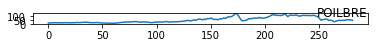

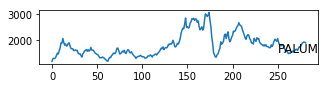

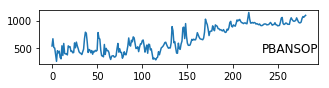

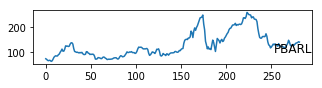

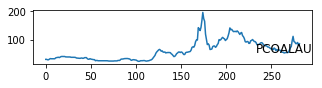

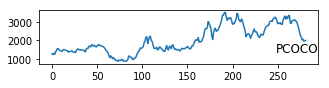

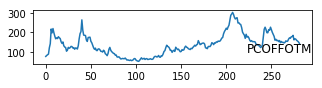

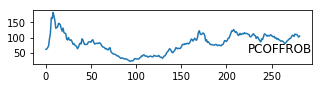

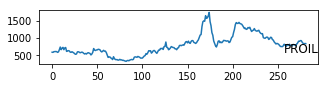

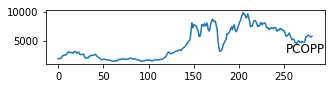

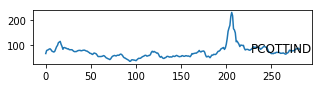

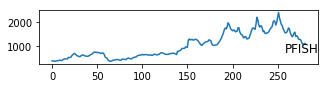

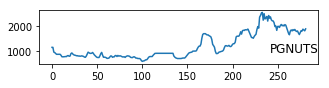

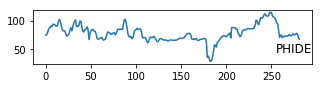

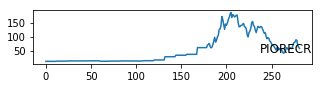

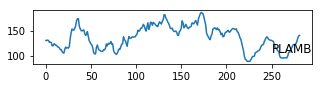

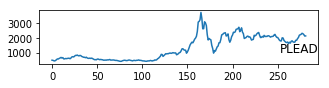

<Figure size 360x1440 with 0 Axes>

In [63]:
from matplotlib import pyplot
# load dataset
dataset = read_csv('oil_data.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17]
i = 1

# plot each column
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.1, loc='right')
	pyplot.figure(figsize=(5,20))
	i += 1

pyplot.show()

## LSTM Data Preparation

Frame the dataset as a supervised learning problem and normalizing the input variables.<br>
Use series_to_supervised function to do so - more on https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

In [83]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [65]:
dataset.head()

,POILBRE,PALUM,PBANSOP,PBARL,PBEEF,PCOALAU,PCOCO,PCOFFOTM,PCOFFROB,PROIL,...,PSUGAISA,PSUGAUSA,PSUNO,PTEA,PTIN,PURAN,PWHEAMT,PWOOLC,PWOOLF,PZINC
month,,,,,,,,,,,,,,,,,,,,,
1994-01-01,14.22,1170.00,532.64,74.62,109.84,31.0,1263.63,77.21,60.91,580.65,...,10.30,22.00,891.04,164.45,4950.71,9.45,153.21,320.10,542.31,998.60
1994-02-01,13.75,1270.53,666.90,72.29,113.11,31.0,1226.59,82.16,62.25,576.66,...,10.82,21.94,792.11,173.63,5442.45,9.45,147.04,338.13,606.03,969.75
1994-03-01,13.88,1287.70,505.62,68.29,122.03,29.5,1307.19,85.57,66.46,597.80,...,11.73,21.95,770.20,186.50,5405.52,9.30,141.04,379.25,609.58,937.61
1994-04-01,15.15,1277.29,496.04,66.89,119.19,29.5,1244.00,89.23,72.64,597.51,...,11.01,22.04,757.89,186.31,5383.05,9.25,140.45,376.82,645.79,924.34
1994-05-01,16.26,1321.05,375.77,68.55,108.44,31.4,1378.69,121.98,96.05,601.16,...,11.58,22.18,756.99,183.96,5493.48,9.25,140.15,398.37,719.63,956.71


In [66]:
# ensure all data is float
values = values.astype('float32')

In [67]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var44(t),var45(t),var46(t),var47(t),var48(t),var49(t),var50(t),var51(t),var52(t),var53(t)
1,0.035616,0.000000,0.313158,0.053005,0.179661,0.040890,0.151385,0.100483,0.245222,0.186828,...,0.231831,0.208673,0.233559,0.116537,0.060877,0.018200,0.185529,0.079554,0.130224,0.060821
2,0.031829,0.052981,0.462183,0.041015,0.196173,0.040890,0.137467,0.120228,0.253510,0.184021,...,0.268778,0.209103,0.222424,0.166102,0.059588,0.017038,0.166497,0.115486,0.132675,0.051973
3,0.032877,0.062030,0.283166,0.020430,0.241214,0.032128,0.167753,0.133831,0.279547,0.198894,...,0.239545,0.212967,0.216168,0.165370,0.058803,0.016651,0.164626,0.113363,0.157683,0.048320
4,0.043110,0.056544,0.272533,0.013226,0.226873,0.032128,0.144009,0.148430,0.317769,0.198690,...,0.262688,0.218978,0.215710,0.156320,0.062658,0.016651,0.163674,0.132194,0.208678,0.057231
5,0.052055,0.079606,0.139036,0.021768,0.172591,0.043227,0.194618,0.279070,0.462552,0.201258,...,0.281770,0.230571,0.197953,0.205384,0.062803,0.016651,0.160978,0.128777,0.249964,0.059788


In [68]:
# drop columns we don't want to predict
reframed=reframed.iloc[:,:54]
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var45(t-1),var46(t-1),var47(t-1),var48(t-1),var49(t-1),var50(t-1),var51(t-1),var52(t-1),var53(t-1),var1(t)
1,0.035616,0.000000,0.313158,0.053005,0.179661,0.040890,0.151385,0.100483,0.245222,0.186828,...,0.211249,0.283837,0.081183,0.043713,0.018200,0.205101,0.063799,0.086217,0.068763,0.031829
2,0.031829,0.052981,0.462183,0.041015,0.196173,0.040890,0.137467,0.120228,0.253510,0.184021,...,0.208673,0.233559,0.116537,0.060877,0.018200,0.185529,0.079554,0.130224,0.060821,0.032877
3,0.032877,0.062030,0.283166,0.020430,0.241214,0.032128,0.167753,0.133831,0.279547,0.198894,...,0.209103,0.222424,0.166102,0.059588,0.017038,0.166497,0.115486,0.132675,0.051973,0.043110
4,0.043110,0.056544,0.272533,0.013226,0.226873,0.032128,0.144009,0.148430,0.317769,0.198690,...,0.212967,0.216168,0.165370,0.058803,0.016651,0.164626,0.113363,0.157683,0.048320,0.052055
5,0.052055,0.079606,0.139036,0.021768,0.172591,0.043227,0.194618,0.279070,0.462552,0.201258,...,0.218978,0.215710,0.156320,0.062658,0.016651,0.163674,0.132194,0.208678,0.057231,0.055923


## Define and Fit Model

In [72]:
# split into train and test sets
values = reframed.values
n_train_month = 18 * 12
train = values[:n_train_month, :]
test = values[n_train_month:, :]

In [73]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [74]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(216, 1, 53) (216,) (65, 1, 53) (65,)


In [75]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

Train on 216 samples, validate on 65 samples
Epoch 1/50
 - 1s - loss: 0.2514 - val_loss: 0.4613
Epoch 2/50
 - 0s - loss: 0.1878 - val_loss: 0.3348
Epoch 3/50
 - 0s - loss: 0.1493 - val_loss: 0.2322
Epoch 4/50
 - 0s - loss: 0.1270 - val_loss: 0.1738
Epoch 5/50
 - 0s - loss: 0.1156 - val_loss: 0.1530
Epoch 6/50
 - 0s - loss: 0.1090 - val_loss: 0.1402
Epoch 7/50
 - 0s - loss: 0.1067 - val_loss: 0.1319
Epoch 8/50
 - 0s - loss: 0.1029 - val_loss: 0.1261
Epoch 9/50
 - 0s - loss: 0.0930 - val_loss: 0.1220
Epoch 10/50
 - 0s - loss: 0.0803 - val_loss: 0.1192
Epoch 11/50
 - 0s - loss: 0.0725 - val_loss: 0.1164
Epoch 12/50
 - 0s - loss: 0.0658 - val_loss: 0.1105
Epoch 13/50
 - 0s - loss: 0.0594 - val_loss: 0.1024
Epoch 14/50
 - 0s - loss: 0.0561 - val_loss: 0.0954
Epoch 15/50
 - 0s - loss: 0.0550 - val_loss: 0.0918
Epoch 16/50
 - 0s - loss: 0.0530 - val_loss: 0.0902
Epoch 17/50
 - 0s - loss: 0.0506 - val_loss: 0.0900
Epoch 18/50
 - 0s - loss: 0.0485 - val_loss: 0.0907
Epoch 19/50
 - 0s - loss: 0.

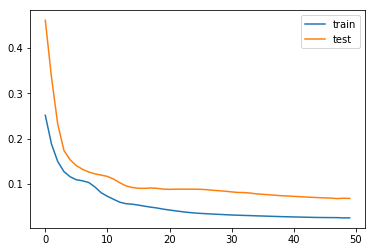

In [76]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Evaluate Model

In [77]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 9.722
